# What is `DBSCAN` clustering algorithm?

## Motivation

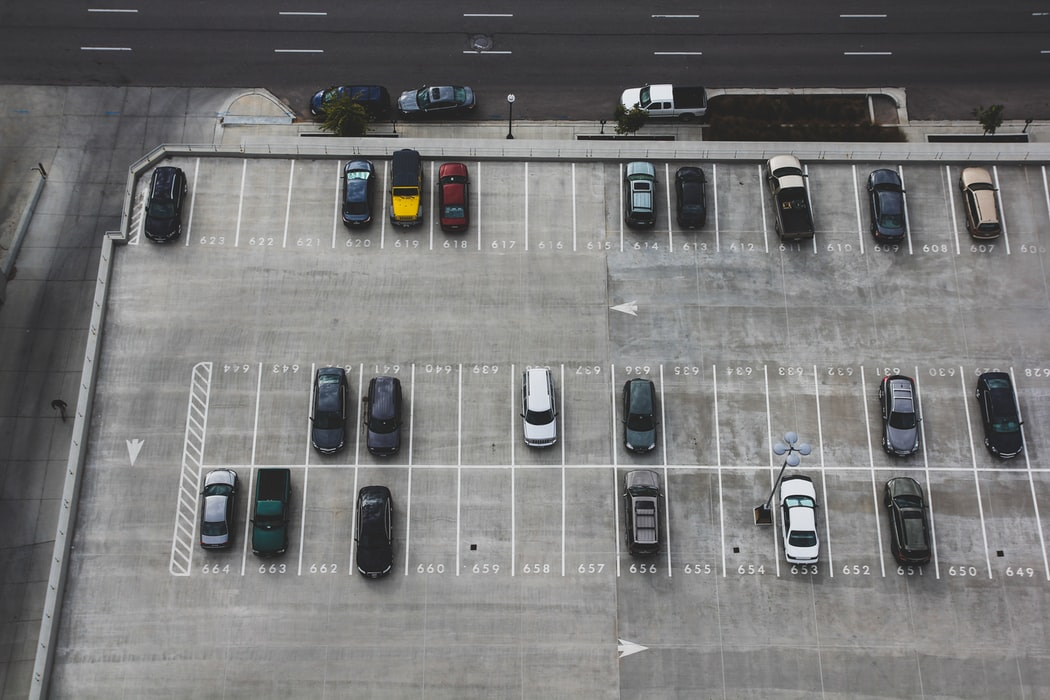

(Image credit to https://unsplash.com/photos/yvfp5YHWGsc)

Suppose you're waiting for a friend in a quiet parking lot. There is no one around and no car moving in/out of the lot. To pass the time, you decide to group these cars into clusters based on how close together they are. But you realize it's not as easy as you initially thought. For example, is the car in parking spot 638 in a different cluster from the cars in spots 636 and 656? You think they are close enough that you can consider them as being in the same cluster. But what about the car in 611? Is it in a cluster by itself, or is it in the same cluster as all the other cars in the top right corner? If we let these cars join together to form a bigger cluster, where do we stop? Can we say all the top row of cars belong to one big cluster, and the bottom two rows belong to another big cluster? Or maybe we can divide the cars into left and right clusters?

You want to develop a well-defined set of rules for identifying clusters. You convince yourself that this problem is important, and you're not just distracting yourself while waiting for your friend. For instance, if you saw the driver in spot 611 coughing as he enters the car, drivers in spots 613 and 609 may want to be notified. If the drivers in 613 and 609 disperse the aerosol while driving off, perhaps drivers in 614 and 607 may need to be notified as well. Drivers in other spots probably wouldn't be concerned, since other cars in the parking lot are at least 3 spots away from cars 614 - 607. Finding out which cars are clustered together can help you quickly determine which drivers to warn when you witness someone coughing!

You decide that 15 ft (roughly the width of 2 parking spots) should be a safe cut-off, since you don't think cough particles could travel past 15 ft. Using the intuition you just developed, you formalize your clustering system as follows:

## Overview of Process

First, you'll pick a car at random. Then, you will quickly make a note how many cars are within 15 ft of this car, including the car itself. If you find there is no other car nearby, you can be assured that this car wouldn't affect other cars in the parking lot. You can consider this car as being a "noise" car that doesn't belong to any cluster, and move on to picking another car. Once you have found a "core" car with at least one other car nearby, you can label each car within 15 ft of this car as being in the same cluster, check if there are any other unlabelled cars within 15 ft of these newly labelled cars, and so on. Once you find that there are no other unlabelled cars within 15 ft of each labelled car, you will label all these labelled cars as belonging to the same cluster. 

Then, you'll continue repeating the above process until all cars are labelled either as being a "noise" car, or as belonging to a cluster.

Let's put this into practice using a concrete example. 

## Step-By-Step

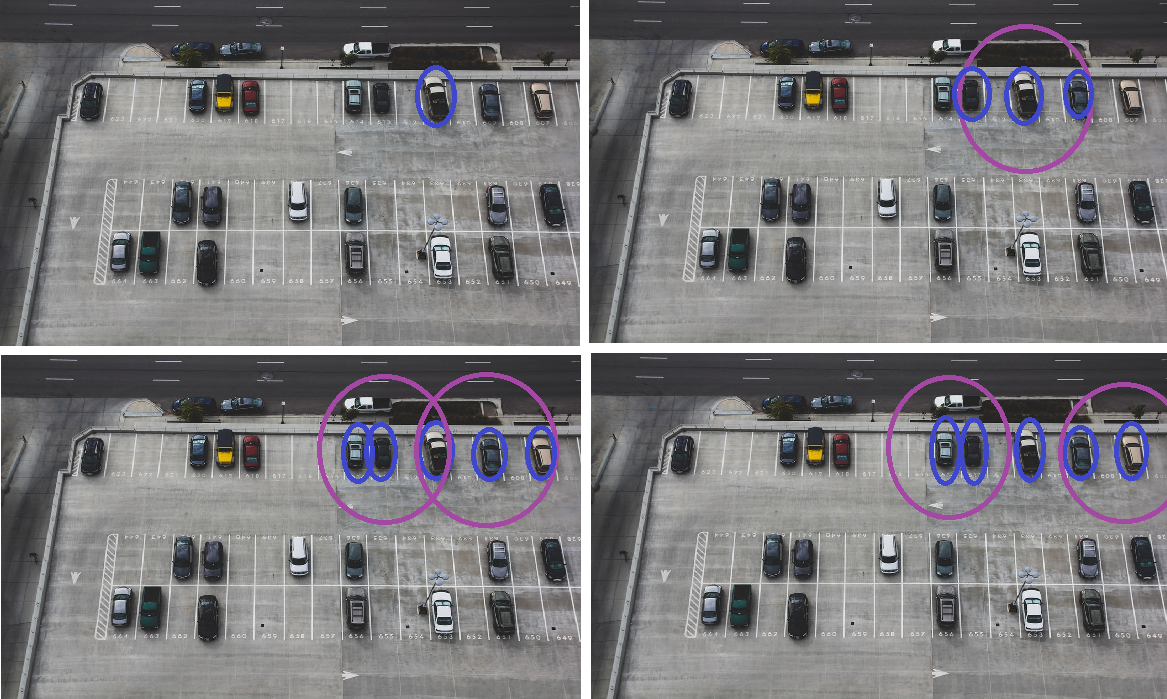

First, you randomly pick the car in 611. Cars in spots 613 and 609 are within 15 ft of this car, so you are satisfied that car in 611 qualifies as a "core" car. Car in 607 is within 15 ft of car in 609, and car in 614 is within 15 ft of car in 613. Since no unlabelled car is within 15 ft of 607 or 614, you conclude that cars 614, 613, 611, 609, 607 are in this first cluster.

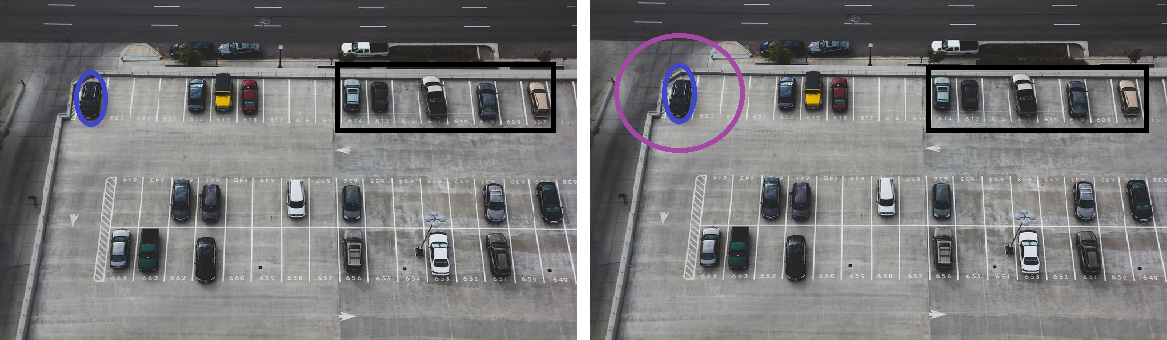

Next, you randomly pick the car in 624 (top left corner). Since there is no car within 15 ft of this car aside from itself, this car is not a "core" car. Instead you make a mental note to label this car as being a "noise" car so you don't make the mistake of picking this car again.

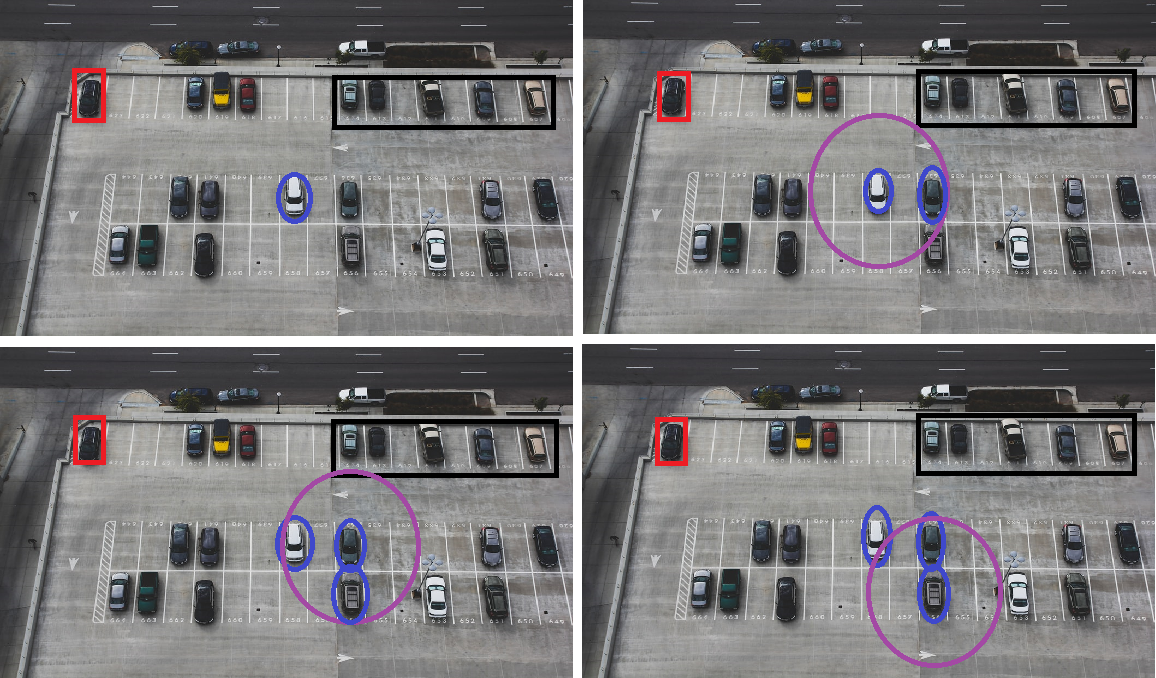

Next, you randomly pick the car in 638. Since car in 636 is within 15 ft of this car, you are happy that car in 636 is a "core" car. Car in 656 is within 15 ft of car in 636. Finally, since there is no unlabelled car near 656, you conclude that cars 638, 636, and 656 belong to this second cluster. 

When you continue this process until you are finished labelling all cars as either being a "noise" car or belonging to a cluster, you obtain the final clustering shown below. Note that this picture shows 1 "noise" car (labelled red) and 5 clusters.

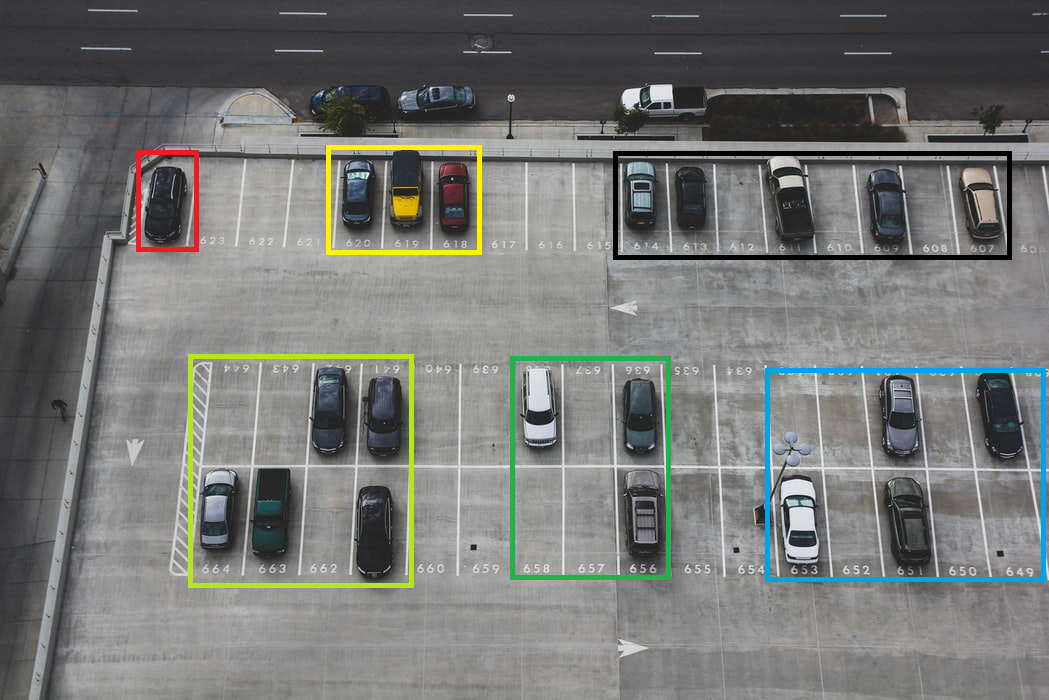

In a nutshell, this is the process of `DBSCAN`, short for "Density-Based Spatial Clustering of Applications with Noise". The magic of `DBSCAN` is that it can be used without guessing in advance how many clusters there are; this sets `DBSCAN` apart from other clustering processes such as `KMeans`. Instead, `DBSCAN` requires you to specify two settings: 

1. `eps`, a threshold for the maximum distance between a point and other points for these points to be considered as being in the "neighborhood" of this point, and 

2. `min_samples`, a threshold for the minimum number of points in the neighborhood of randomly picked point (including the point itself) for this point to be considered as a "core" point. 

In our parking lot example, 15 ft is the `eps` setting, and 2 cars is the `min_samples` setting.

## Closing Remarks

This example may seem a little contrived, but `DBSCAN` can be a versatile tool for a variety of real-world tasks. These tasks can include using physical distances (as in the example above) between real-estate properties to find out which neighborhoods they belong to. They can also use abstract measures of distance such as how similar products are (based on how often they are bought together) in order to determine clustering for products, which can then be used to make product recommendations.